In [1]:
__name__

'__main__'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import bottleneck
import statsmodels.api as sm
import openpyxl
import xlrd

In [3]:
pd.__version__

'1.1.3'

In [4]:
np.__version__

'1.19.2'

In [5]:
patience_location = "/Users/Perry/Google Drive File Stream/My Drive/Commerce/Fall 20/BUSA 521/Patience/Analysis of Cleared out data from march to august , work in progress.xlsx"

In [6]:
patience = pd.read_excel(io=patience_location)
patience.head()

,We are trying to forecast the impact of covid on the numebr of air travllers .,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Dependent Variable,Independent Variable,NaN,NaN,NaN,NaN
1,No,Number of travellers 2020,Total Traveler Throughput,Jet fuel price,Unemployment,Covid Cases,Sample Period
2,1,2280522,2301439,0,715827,75,2020-03-01 00:00:00
3,2,2089641,2257920,1.438,715827,100,2020-03-02 00:00:00
4,3,1736393,1979558,1.43,715827,124,2020-03-03 00:00:00


In [7]:
patience.drop(labels=0, axis="rows", inplace=True)
patience.head()

,We are trying to forecast the impact of covid on the numebr of air travllers .,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,No,Number of travellers 2020,Total Traveler Throughput,Jet fuel price,Unemployment,Covid Cases,Sample Period
2,1,2280522,2301439,0,715827,75,2020-03-01 00:00:00
3,2,2089641,2257920,1.438,715827,100,2020-03-02 00:00:00
4,3,1736393,1979558,1.43,715827,124,2020-03-03 00:00:00
5,4,1877401,2143619,1.438,715827,158,2020-03-04 00:00:00


In [8]:
patience.drop(labels=["We are trying to forecast the impact of covid on the numebr of air travllers ."], axis=1, inplace=True)
patience.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,Number of travellers 2020,Total Traveler Throughput,Jet fuel price,Unemployment,Covid Cases,Sample Period
2,2280522,2301439,0,715827,75,2020-03-01 00:00:00
3,2089641,2257920,1.438,715827,100,2020-03-02 00:00:00
4,1736393,1979558,1.43,715827,124,2020-03-03 00:00:00
5,1877401,2143619,1.438,715827,158,2020-03-04 00:00:00


In [9]:
patience.columns = patience.loc[1, :].values

In [10]:
patience.drop(labels=1, axis=0, inplace=True)
patience.head()

,Number of travellers 2020,Total Traveler Throughput,Jet fuel price,Unemployment,Covid Cases,Sample Period
2,2280522,2301439,0,715827,75,2020-03-01 00:00:00
3,2089641,2257920,1.438,715827,100,2020-03-02 00:00:00
4,1736393,1979558,1.43,715827,124,2020-03-03 00:00:00
5,1877401,2143619,1.438,715827,158,2020-03-04 00:00:00
6,2130015,2402692,1.379,715827,221,2020-03-05 00:00:00


In [11]:
patience.reset_index(drop=True, inplace=True)
patience.head()

,Number of travellers 2020,Total Traveler Throughput,Jet fuel price,Unemployment,Covid Cases,Sample Period
0,2280522,2301439,0,715827,75,2020-03-01 00:00:00
1,2089641,2257920,1.438,715827,100,2020-03-02 00:00:00
2,1736393,1979558,1.43,715827,124,2020-03-03 00:00:00
3,1877401,2143619,1.438,715827,158,2020-03-04 00:00:00
4,2130015,2402692,1.379,715827,221,2020-03-05 00:00:00


In [12]:
patience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Number of travellers  2020  184 non-null    object
 1   Total Traveler Throughput   184 non-null    object
 2   Jet fuel price              184 non-null    object
 3   Unemployment                184 non-null    object
 4   Covid Cases                 184 non-null    object
 5   Sample Period               184 non-null    object
dtypes: object(6)
memory usage: 8.8+ KB


In [13]:
len(patience) - patience.count()

Number of travellers  2020    0
Total Traveler Throughput     0
Jet fuel price                0
Unemployment                  0
Covid Cases                   0
Sample Period                 0
dtype: int64

In [14]:
patience["Number of travellers  2020"] = patience["Number of travellers  2020"].astype(dtype="int")
patience["Total Traveler Throughput"] = patience["Total Traveler Throughput"].astype(dtype="int")
patience["Jet fuel price "] = patience["Jet fuel price "].astype(dtype="float")
patience["Unemployment"] = patience["Unemployment"].astype(dtype="int")
patience["Covid Cases"] = patience["Covid Cases"].astype(dtype="int")
patience["Sample Period  "] = pd.to_datetime(patience["Sample Period  "])
patience.head()

,Number of travellers 2020,Total Traveler Throughput,Jet fuel price,Unemployment,Covid Cases,Sample Period
0,2280522,2301439,0.000,715827,75,2020-03-01
1,2089641,2257920,1.438,715827,100,2020-03-02
2,1736393,1979558,1.430,715827,124,2020-03-03
3,1877401,2143619,1.438,715827,158,2020-03-04
4,2130015,2402692,1.379,715827,221,2020-03-05


In [15]:
patience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Number of travellers  2020  184 non-null    int64         
 1   Total Traveler Throughput   184 non-null    int64         
 2   Jet fuel price              184 non-null    float64       
 3   Unemployment                184 non-null    int64         
 4   Covid Cases                 184 non-null    int64         
 5   Sample Period               184 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 8.8 KB


In [16]:
Y_Var = patience["Number of travellers  2020"]
X_Var = patience.drop(labels=["Number of travellers  2020", "Sample Period  "], axis=1)

In [17]:
X_Var = sm.add_constant(data=X_Var)

In [18]:
patience_model_1 = sm.OLS(Y_Var, X_Var).fit()

# The Model:
# DV : Number of travellers  2020
# IV1 : Total Traveler Throughput
# IV2 : Jet fuel price 
# IV3 : Unemployment
# IV4 : Covid Cases

In [19]:
patience_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Number of travellers  2020   R-squared:                       0.495
Model:                                    OLS   Adj. R-squared:                  0.484
Method:                         Least Squares   F-statistic:                     43.93
Date:                        Fri, 20 Nov 2020   Prob (F-statistic):           1.18e-25
Time:                                19:57:03   Log-Likelihood:                -2599.5
No. Observations:                         184   AIC:                             5209.
Df Residuals:                             179   BIC:                             5225.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.579e+06   3.01e+05      5.251      0.000    9.86e+05    2.17e+06
Total Traveler Throughput     0.0257      0.121      0.212      0.832      -0.214       0.265
Jet fuel price              7.03e+04   5.79e+04      1.215      0.226   -4.39e+04    1.84e+05
Unemployment                 -0.8516      0.068    -12.508      0.000      -0.986      -0.717
Covid Cases                  -0.0318      0.014     -2.351      0.020      -0.059      -0.005
==============================================================================
Omnibus:                       26.413   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.283
Skew:                           0.428   Prob(JB):                     2.76e-22
Kurtosis:                       6.495   Cond. No.                     4.63e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Time Series:
# Analyze how Covid-19 affected the Airline Industry from 03/20 to 08/20
# Y : Number Of Airline Travellers in 2020
# X : Sample Period

In [20]:
patience_time_series = patience.loc[:, ["Number of travellers  2020", "Sample Period  "]]
patience_time_series.reset_index(drop=True, inplace=True)

In [21]:
patience_time_series.set_index(keys=["Sample Period  "], inplace=True)
patience_time_series.head()

,Number of travellers 2020
Sample Period,
2020-03-01,2280522
2020-03-02,2089641
2020-03-03,1736393
2020-03-04,1877401
2020-03-05,2130015


In [22]:
patience_time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2020-03-01 to 2020-08-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Number of travellers  2020  184 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


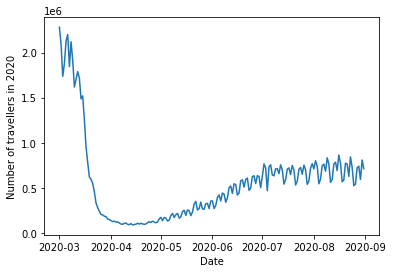

In [23]:
# plot graph

plt.xlabel("Date")
plt.ylabel("Number of travellers in 2020")
plt.plot(patience_time_series)

<AxesSubplot:xlabel='Sample Period  '>

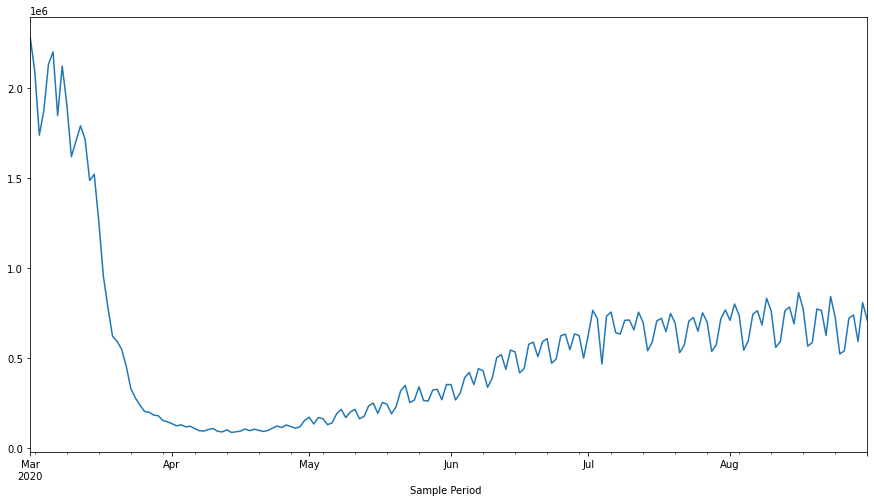

In [24]:
patience_time_series.loc[:, "Number of travellers  2020"].plot(figsize=(15, 8))

<AxesSubplot:xlabel='Sample Period  '>

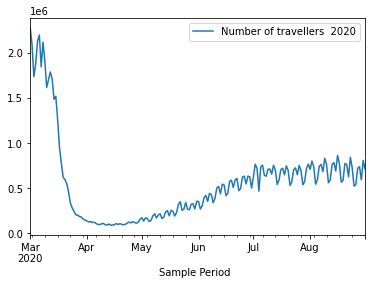

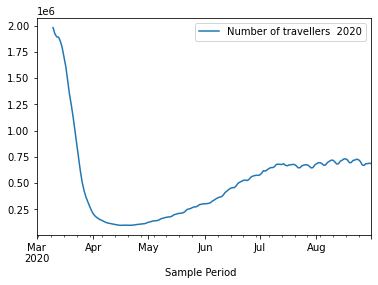

In [25]:
patience_time_series.plot()
patience_time_series.rolling(window=10).mean().plot()

# Time Series Analysis with Moving Average of 5

<AxesSubplot:xlabel='Sample Period  '>

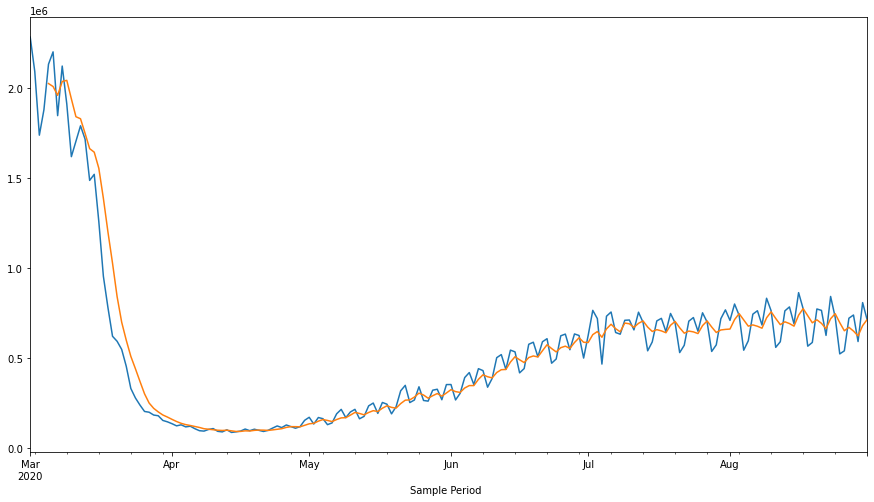

In [26]:
patience_time_series["Number of travellers  2020"].plot(figsize=(15, 8))
patience_time_series["Number of travellers  2020"].rolling(window=5).mean().plot()

# Time Series Analysis with Moving Average of 10

<AxesSubplot:xlabel='Sample Period  '>

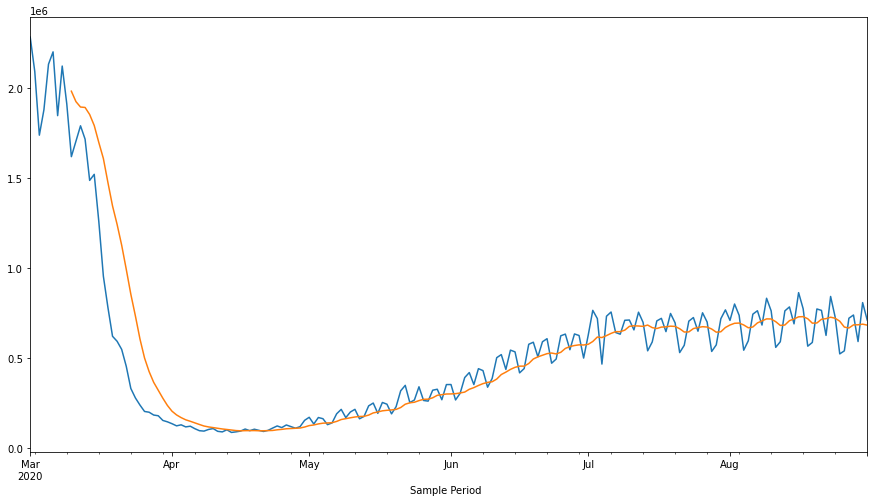

In [27]:
patience_time_series["Number of travellers  2020"].plot(figsize=(15, 8))
patience_time_series["Number of travellers  2020"].rolling(window=10).mean().plot()

# Time Series Analysis with Moving Average of 20

<AxesSubplot:xlabel='Sample Period  '>

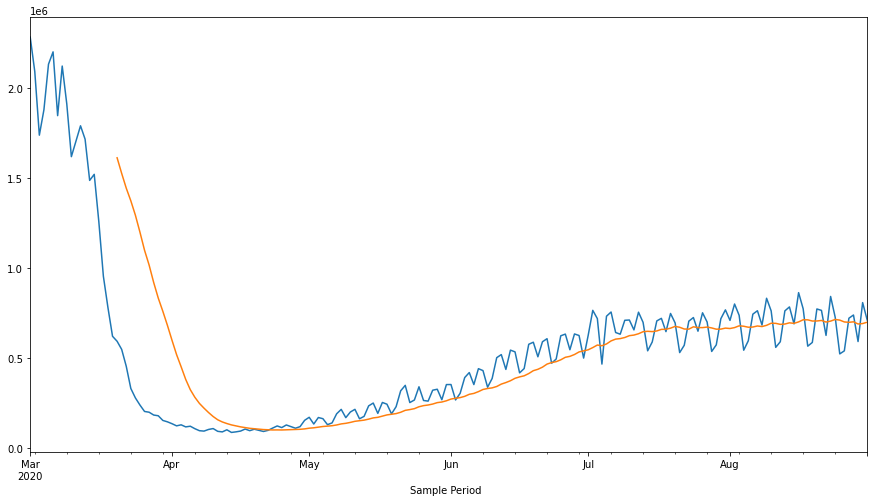

In [28]:
patience_time_series["Number of travellers  2020"].plot(figsize=(15, 8))
patience_time_series["Number of travellers  2020"].rolling(window=20).mean().plot()

# Time Series Analysis with Moving Average of 30

<AxesSubplot:xlabel='Sample Period  '>

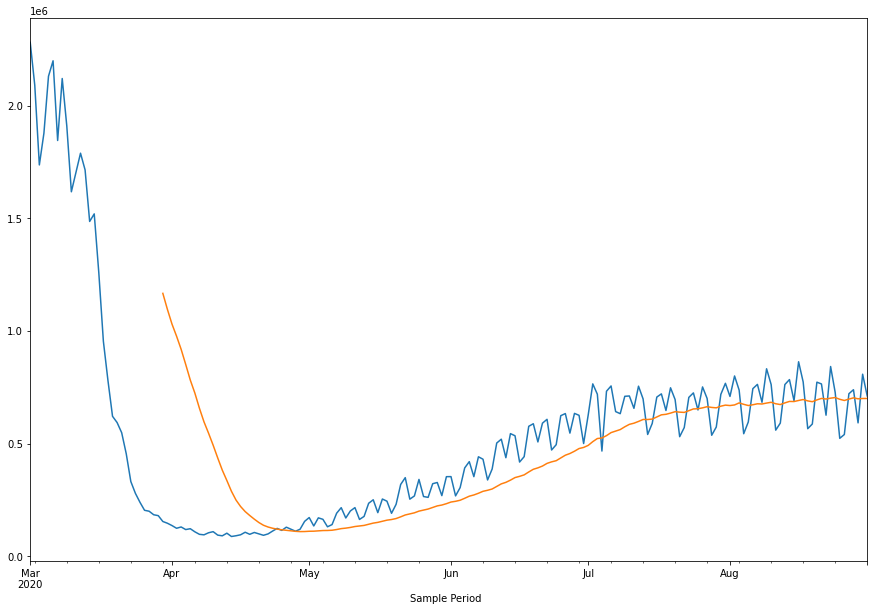

In [29]:
patience_time_series["Number of travellers  2020"].plot(figsize=(15, 10))
patience_time_series["Number of travellers  2020"].rolling(window=30).mean().plot()

# Time Series Analysis with Moving Standard Deviation of 5

<AxesSubplot:xlabel='Sample Period  '>

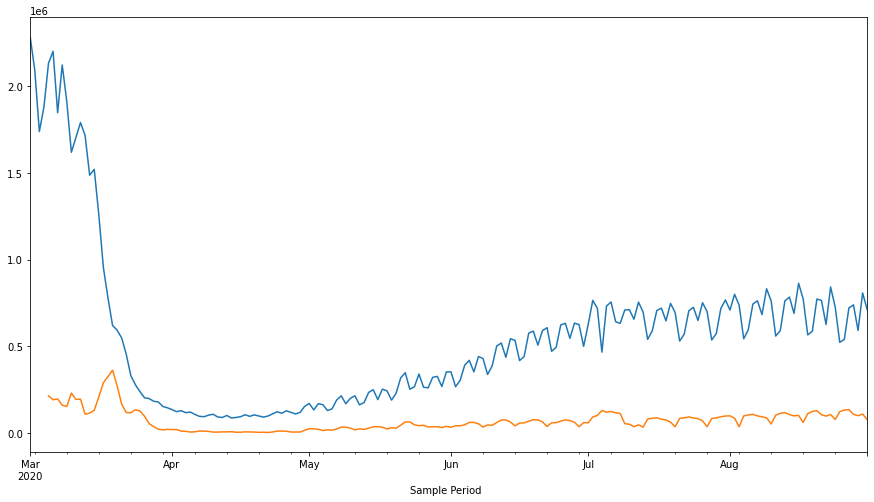

In [30]:
patience_time_series["Number of travellers  2020"].plot(figsize=(15, 8))
patience_time_series["Number of travellers  2020"].rolling(window=5).std().plot()

In [31]:
patience_time_series["Moving_Average_5"] = patience_time_series["Number of travellers  2020"].rolling(window=5).mean()
patience_time_series["Moving_Average_10"] = patience_time_series["Number of travellers  2020"].rolling(window=10).mean()
patience_time_series["Moving_Average_20"] = patience_time_series["Number of travellers  2020"].rolling(window=20).mean()
patience_time_series["Moving_Average_30"] = patience_time_series["Number of travellers  2020"].rolling(window=30).mean()
patience_time_series["Moving_Standard_Deviation_20"] = patience_time_series["Number of travellers  2020"].rolling(window=5).std()

In [32]:
# Export the Time Series data as a new Excel File

patience_time_series.to_excel(excel_writer="Time Series (Patience).xlsx", sheet_name="sheet 1", index=True)